# FIFA 21 Machine Learning Project - KNN

Objective: identify players that are above average

Target Column: 'Overall'

Model: Decision Tree

In [1]:
!pip install pydotplus

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

## Load the dataset and clean it

Download the full FIFA 21 Dataset from the link here: [Kaggle FIFA Player Stats Database](https://www.kaggle.com/datasets/bryanb/fifa-player-stats-database?resource=download&select=FIFA21_official_data.csv).

In [2]:
from google.colab import drive
drive.mount('/content/drive')

file_path = '/content/drive/My Drive/REATBFZR_Filbert Naldo Wijaya/FIFA21_official_data.csv'
df = pd.read_csv(file_path)

df.head()

Mounted at /content/drive


,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Best Position,Best Overall Rating,Release Clause,DefensiveAwareness
0,176580,L. Suárez,33,https://cdn.sofifa.com/players/176/580/20_60.png,Uruguay,https://cdn.sofifa.com/flags/uy.png,87,87,Atlético Madrid,https://cdn.sofifa.com/teams/240/light_30.png,...,38.0,27.0,25.0,31.0,33.0,37.0,ST,87.0,€64.6M,57.0
1,192985,K. De Bruyne,29,https://cdn.sofifa.com/players/192/985/20_60.png,Belgium,https://cdn.sofifa.com/flags/be.png,91,91,Manchester City,https://cdn.sofifa.com/teams/10/light_30.png,...,53.0,15.0,13.0,5.0,10.0,13.0,CAM,91.0,€161M,68.0
2,212198,Bruno Fernandes,25,https://cdn.sofifa.com/players/212/198/20_60.png,Portugal,https://cdn.sofifa.com/flags/pt.png,87,90,Manchester United,https://cdn.sofifa.com/teams/11/light_30.png,...,55.0,12.0,14.0,15.0,8.0,14.0,CAM,88.0,€124.4M,72.0
3,194765,A. Griezmann,29,https://cdn.sofifa.com/players/194/765/20_60.png,France,https://cdn.sofifa.com/flags/fr.png,87,87,FC Barcelona,https://cdn.sofifa.com/teams/241/light_30.png,...,49.0,14.0,8.0,14.0,13.0,14.0,ST,87.0,€103.5M,59.0
4,224334,M. Acuña,28,https://cdn.sofifa.com/players/224/334/20_60.png,Argentina,https://cdn.sofifa.com/flags/ar.png,83,83,Sevilla FC,https://cdn.sofifa.com/teams/481/light_30.png,...,79.0,8.0,14.0,13.0,13.0,14.0,LB,83.0,€46.2M,79.0


In [3]:
# Preprocessing and Data Cleaning

df['Value'] = df['Value'].replace('€', '', regex=True)

def convert(price):
  if 'K' in price:
    price = price.replace('K', '')
    return int(float(price) * 1000)
  elif 'M' in price:
    price = price.replace('M', '')
    return int(float(price) * 1000000)
  return int(price)

df['Value'] = df['Value'].apply(convert)

# Load your data
df['Value'].head()

,Value
0,31500000
1,87000000
2,63000000
3,50500000
4,22000000


In [4]:
# Calculate the median value
median_value = df['Value'].median()

# Replace 'Value' of 0 with the median value
df['Value'] = df['Value'].replace(0, median_value)

# Display the first few rows to confirm the changes
df[['Name', 'Value']]

,Name,Value
0,L. Suárez,31500000
1,K. De Bruyne,87000000
2,Bruno Fernandes,63000000
3,A. Griezmann,50500000
4,M. Acuña,22000000
...,...,...
17103,19 C. Miszta,50000
17104,B. Voll,50000
17105,T. Parker,60000
17106,H. Sveijer,50000


Train set: (13686, 2) (13686,)
Test set: (3422, 2) (3422,)
        Value  Special
8840   875000     1643
7880  2100000     1677
9306   525000     1626
2095  3300000     1912
548   6500000     2039
[[2897   44]
 [ 119  362]]
Accuracy:  0.9523670368205728
F1 Score:  0.8162344983089064


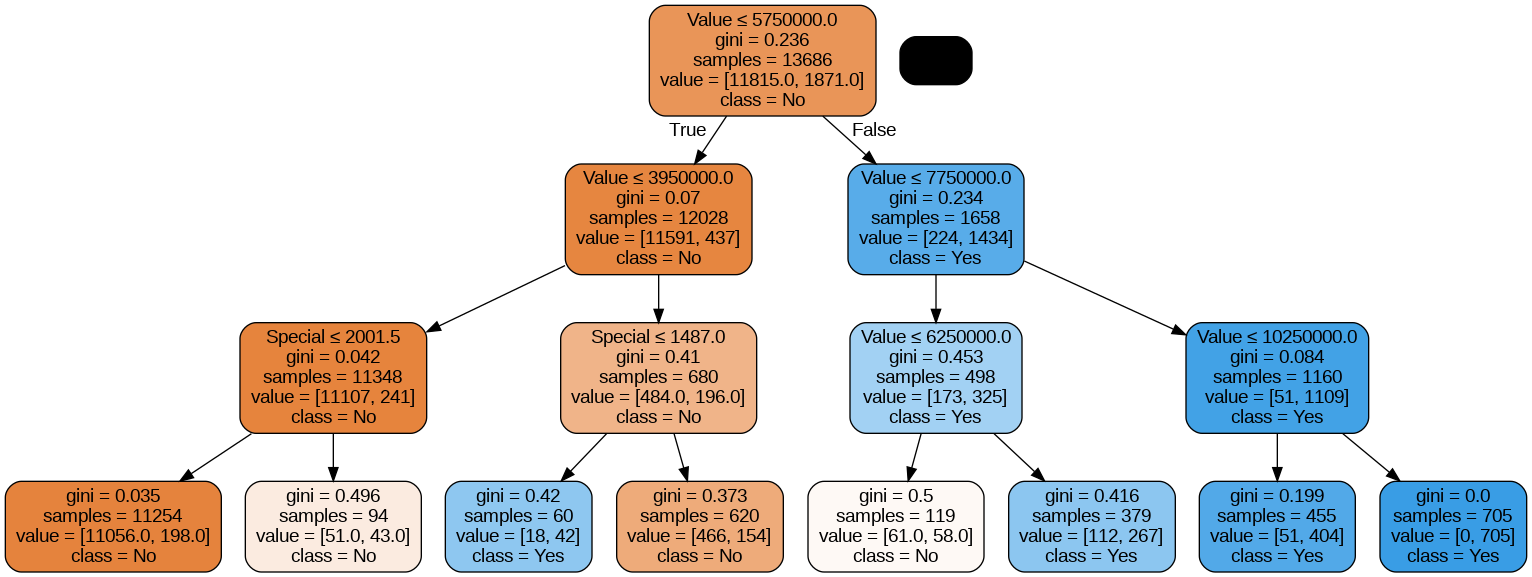

In [6]:
# Columns (Features) used in model
dataset = df[['Value', 'Special']].copy()

# Define the target output (Good >= 75)
dataset['Status'] = df.loc[:, 'Overall'].apply(lambda x: 1 if x >= 75 else 0)

# print(dataset.head(10))

ml_features = ['Value', 'Special']

# Split data into training set and test set
X = dataset.iloc[:, 0:2]
y = dataset.iloc[:, 2]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.2)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

# Train the model
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

# Make predictions using the test set
print(X_test.head())
y_pred = model.predict(X_test)
# print(y_hat)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
print(cm)

ml_accuracy = accuracy_score(y_test, y_pred)
ml_f1_score = f1_score(y_test, y_pred)

print("Accuracy: ", ml_accuracy)
print("F1 Score: ", ml_f1_score)

# Draw decision tree
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus

dot_data = export_graphviz(model, out_file=None, feature_names=ml_features, class_names=["No", "Yes"], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())
